In [1]:
import random
import math
import time


def read_bpp_file(file_path):
    with open(file_path, 'r') as f:
        n = int(f.readline().strip())
        capacity = int(f.readline().strip())
        objects = [int(line.strip()) for line in f]
    return n,capacity, objects



# Introduction

Dans ce qui suit on examinera l'impact de differentes solutions sur la performance (Nombre de bins) et temps d'execution. il s'agit d'une comparaion de la methode exacte branch and bound examine dans le TP precendant avec differentes heurestiques

# Heurestiques
Dans cette partie on va introduire plusieur methodes.

## Next Fit
Cet algorithme naïf tente de remplir les bacs séquentiellement, sans jamais vérifier les bacs précédents pour voir s'il y a de la place disponible. Le temps d'exécution de cet algorithme est O(n) car il prend une décision binaire pour chaque valeur, soit de placer la valeur dans le dernier bac, soit de créer un nouveau bac et de la placer là-bas, pour chacune des n valeurs. Comme on peut s'y attendre, l'algorithme a un gaspillage moyen élevé.

In [2]:
import time

def next_fit(items, capacite_bin):
    start_time = time.time()  # Record start time

    bins = []
    bin_courant = {'espace_libre': capacite_bin, 'items': []}

    for item in items:
        if item <= bin_courant['espace_libre']:
            bin_courant['items'].append(item)
            bin_courant['espace_libre'] -= item
        else:
            bins.append(bin_courant.copy())
            bin_courant = {'espace_libre': capacite_bin, 'items': [item]}
            bin_courant['espace_libre'] -= item

    bins.append(bin_courant.copy())  # Add the last bin

    execution_time = time.time() - start_time  # Calculate execution time

    return len(bins), execution_time  # Return both results




In [3]:
def next_fit_decreasing_with_refinement(items, bin_capacity):

    start_time = time.time()
    # Trie les objets par taille décroissante
    items_sorted = sorted(items, reverse=True)

    # Next Fit initial
    bins = []  # Initialise une liste pour stocker les conteneurs
    current_bin = []  # Initialise le conteneur courant
    for item in items_sorted:
        if sum(current_bin) + item <= bin_capacity:  # Vérifie si l'objet peut être placé dans le conteneur courant
            current_bin.append(item)  # Ajoute l'objet au conteneur courant
        else:
            bins.append(current_bin)  # Ajoute le conteneur courant à la liste des conteneurs
            current_bin = [item]  # Commence un nouveau conteneur avec l'objet actuel
    bins.append(current_bin)  # Ajoute le dernier conteneur courant

    for bin in bins:
        bin.sort()

    # Raffinement
    # Parcours de chaque conteneur pour voir s'il est possible de fusionner les objets d'autres conteneurs
    for i, bin in enumerate(bins):
        # Parcours des autres conteneurs pour fusionner les objets si possible
        for other_bin in bins[i+1:]:
            # Parcours des objets du conteneur courant
            for item in other_bin[:]:
                if sum(bin) + item <= bin_capacity:  # Vérifie si l'objet peut être fusionné dans le conteneur courant
                    bin.append(item)  # Ajoute l'objet au conteneur courant
                    other_bin.remove(item)  # Retire l'objet du conteneur d'origine

    # Trie les objets à l'intérieur de chaque conteneur dans l'ordre croissant
    for bin in bins:
        bin.sort()

    # Supprime les conteneurs vides
    bins = [bin for bin in bins if bin]

    end_time = time.time()  # Enregistrer le temps de fin
    execution_time = end_time - start_time  # Calculer le temps d'exécution

    return bins, execution_time


## First Fit

Cet algorithme glouton tente de placer les valeurs dans le premier bac disponible, recommençant sa recherche au début de la séquence des bacs pour chaque valeur à emballer. Le temps d'exécution est O(n<sup>2</sup>) car dans le pire des cas, il n'y aura pas de place pour aucune valeur et elles seront soit placées dans le dernier bac, soit un nouveau sera créé. Bien que cet algorithme soit beaucoup plus lent, il génère beaucoup moins de gaspillage.

In [4]:
import time

def first_fit(items, capacite_bin):
    start_time = time.time()

    bins = []
    for item in items:
        assigne = False

        for bin in bins:
            if item <= bin['espace_libre']:
                bin['items'].append(item)
                bin['espace_libre'] -= item
                assigne = True
                break

        if not assigne:
            nouveau_bin = {'espace_libre': capacite_bin - item, 'items': [item]}
            bins.append(nouveau_bin)

    execution_time = time.time() - start_time

    return len(bins), execution_time


## First Fit Decreasing
Une des ameliorations possible sur l'algorithme precedent est d'ordonner la liste des donnees permettant de placer les grand elements d'abord dans les bins.


In [5]:
def first_fit_decreasing(items, capacite_bin):
    items.sort(reverse=True)  # trier les éléments par taille, du plus grand au plus petit
    result,exectime=first_fit(items, capacite_bin)
    return result,exectime

## Best Fit

Cet algorithme est de loin le plus lent de tous. Cela est dû au fait qu'il itère à travers toute la séquence de bacs et se souvient du bac qui avait le moins d'espace disponible mais pouvait quand même emballer la valeur. Si la valeur ne pouvait pas être placée quelque part, un nouveau bac est ajouté et la valeur est emballée là-bas. Cela entraîne un temps d'exécution de O(n<sup>2</sup>), même dans le meilleur des cas. L'idée derrière cet algorithme est de remplir les bacs aussi étroitement que possible, en veillant à minimiser le gaspillage à chaque emballage d'une valeur.


In [6]:
import time

def best_fit(items, capacite_bin):
    start_time = time.time()

    bins = []

    for item in items:
        bin_optimal = None
        espace_optimal = float('inf') # Initialiser l'espace optimal à l'infini

        for bin in bins:
            if item <= bin['espace_libre'] < espace_optimal:
                bin_optimal = bin
                espace_optimal = bin['espace_libre']

        if bin_optimal is not None:
            bin_optimal['items'].append(item)
            bin_optimal['espace_libre'] -= item
        else:
            nouveau_bin = {'espace_libre': capacite_bin - item, 'items': [item]}
            bins.append(nouveau_bin)


    execution_time = time.time() - start_time

    return len(bins), execution_time

## Best Fit Decreasing

Une des ameliorations possible sur l'algorithme precedent est d'ordonner la liste des donnees permettant de placer les grand elements d'abord dans les bins.

In [7]:
def best_fit_decreasing(items, capacite_bin):
    items.sort(reverse=True)  # trier les éléments par taille, du plus grand au plus petit
    return best_fit(items, capacite_bin)

## Best Fit Avec Reorganisation

Nous effectuons une réorganisation des bacs si nécessaire pour optimiser l'espace utilisé.

In [8]:
def reorganize_bins(bins, weights):
    # Calculer le poids minimum des objets restants
    min_remaining_weight = min(weights)

    # Calculer la somme de l'espace gaspillé dans tous les bacs
    wasted_space_sum = sum([espace_libre_dans_bin for espace_libre_dans_bin in bins if espace_libre_dans_bin < min_remaining_weight])

    # Vérifier si une réorganisation est nécessaire
    if wasted_space_sum >= min_remaining_weight:
        removed_items = []  # Pour stocker les articles retirés

        # Trier les bacs par espace restant dans l'ordre décroissant
        sorted_bins = sorted(enumerate(bins), key=lambda x: x[1], reverse=True)

        # Parcourir les bacs et essayer de réorganiser
        for i, espace_libre_dans_bin in sorted_bins:
            if espace_libre_dans_bin >= min_remaining_weight:
                # Vérifier si le dernier élément dans le bac a perdu moins d'espace que le poids minimum
                last_item_lost_space = espace_libre_dans_bin - min_remaining_weight
                if last_item_lost_space < min_remaining_weight:
                    # Retirer le dernier élément du bac et le stocker
                    removed_items.append((i, last_item_lost_space))

        # Placer les éléments retirés en utilisant le Meilleur Ajustement
        for i, espace_perdu in removed_items:
            # Trouver l'élément ayant le poids maximum pour maximiser l'espace perdu
            index_item_poids_max = max(range(len(weights)), key=lambda x: weights[x])

            # Placer l'élément dans le bac actuel
            bins[i] -= weights[index_item_poids_max]
            weights[index_item_poids_max] = 0  # Marquer l'élément comme placé

        return True  # Réorganisation réussie

    return False  # Aucune réorganisation effectuée


In [9]:
import time

def best_fit_org(weights, bin_capacity):
    start_time = time.time()  # Mesure du temps de début de l'exécution

    bins = [bin_capacity]  # Initialise le premier bac avec une capacité totale
    num_bins = 1

    for weight in weights:
        best_bin_index = -1
        min_space_left = float('inf')

        # Trouve le bac avec le meilleur ajustement pour l'objet actuel
        for i, espace_libre_dans_bin in enumerate(bins):
            if weight <= espace_libre_dans_bin < min_space_left:
                best_bin_index = i
                min_space_left = espace_libre_dans_bin

        if best_bin_index == -1:
            # Aucun bac trouvé, crée un nouveau bac
            bins.append(bin_capacity - weight)
            num_bins += 1
        else:
            # Assigner l'objet au bac avec le meilleur ajustement
            bins[best_bin_index] -= weight

        # Effectue une réorganisation si nécessaire
        check =  reorganize_bins(bins, weights)
        if check:
            # Met à jour le nombre de bacs après la réorganisation
            num_bins = len([espace_libre_dans_bin for espace_libre_dans_bin in bins if espace_libre_dans_bin < bin_capacity])

    end_time = time.time()  # Mesure du temps de fin de l'exécution
    execution_time = end_time - start_time  # Calcul du temps total d'exécution

    return num_bins, execution_time



## Worst Fit

L'algorithme Worst Fit fonctionne en plaçant chaque objet dans le bac qui possède actuellement le plus d'espace restant après avoir accueilli l'objet. Cette stratégie vise à maximiser la quantité d'espace vide dans les bacs. Malgré sa simplicité et sa facilité de mise en œuvre, l'approche Worst Fit peut entraîner une utilisation de l'espace moins efficace par rapport à des algorithmes plus sophistiqués comme le First Fit ou le Best Fit. Cependant, elle reste une option viable, notamment dans les scénarios où la simplicité et la rapidité de mise en œuvre sont privilégiées par rapport à une utilisation optimale de l'espace.

In [10]:
import time

def worst_fit(items, bin_capacity):
    start_time = time.time()

    # Initialisation des bacs
    bins = []

    # Compteur de bacs utilisés
    bin_count = 0

    # Itération sur chaque élément
    for item in items:
        trouve_bin = False

        # Tentative d'insertion de l'élément dans les bacs existants
        for i in range(bin_count):
            if bins[i] + item <= bin_capacity:  # Si l'élément rentre dans le bac
                bins[i] += item  # Ajouter l'élément au bac
                trouve_bin = True
                break  # Sortir de la boucle de recherche de bac

        # Si aucun bac existant ne convient, créer un nouveau bac
        if not trouve_bin:
            bins.append(item)
            bin_count += 1

    execution_time = time.time() - start_time

    return bin_count, execution_time


# Benchmarking

[0.0005528926849365234, 0.0034987926483154297, 4.6253204345703125e-05, 0.00016188621520996094, 0.013154268264770508]
[80, 202, 25, 47, 402]


ValueError: x and y must have same first dimension, but have shapes (8,) and (9,)

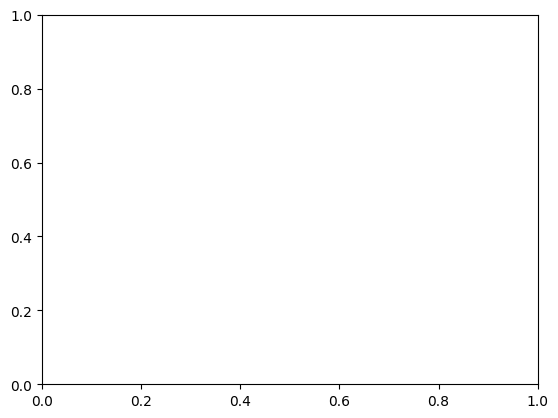

In [12]:
import os
import matplotlib.pyplot as plt

data_directory = "benchmark"
branch_and_bound_time=[]
branch_and_bound_results=[]
next_fit_time=[]
next_fit_results=[]
next_fit_decreasing_time=[]
next_fit_decreasing_results=[]
first_fit_time=[]
first_fit_results=[]
first_fit_decreasing_time=[]
first_fit_decreasing_results=[]
best_fit_time=[]
best_fit_results=[]
best_fit_decreasing_time=[]
best_fit_decreasing_results=[]
worst_fit_time=[]
worst_fit_results=[]
best_fit_org_time=[]
best_fit_org_results=[]


for filename in os.listdir(data_directory):
    filepath = os.path.join(data_directory, filename)
    with open(filepath, "r") as file:
        n,bin_capacity,items=read_bpp_file(filepath)
        result,exectime=next_fit(items, bin_capacity)
        next_fit_results.append(result)
        next_fit_time.append(exectime)
        result,exectime=next_fit_decreasing_with_refinement(items, bin_capacity)
        next_fit_decreasing_results.append(len(result))
        next_fit_decreasing_time.append(exectime)
        result,exectime=first_fit(items, bin_capacity)
        first_fit_results.append(result)
        first_fit_time.append(exectime)
        result,exectime=first_fit_decreasing(items, bin_capacity)
        first_fit_decreasing_results.append(result)
        first_fit_decreasing_time.append(exectime)
        result,exectime=best_fit(items, bin_capacity)
        best_fit_results.append(result)
        best_fit_time.append(exectime)
        result,exectime=best_fit_decreasing(items, bin_capacity)
        best_fit_decreasing_results.append(result)
        best_fit_decreasing_time.append(exectime)
        result,exectime=worst_fit(items, bin_capacity)
        worst_fit_results.append(result)
        worst_fit_time.append(exectime)
        result,exectime=best_fit_org(items, bin_capacity)
        best_fit_org_results.append(result)
        best_fit_org_time.append(exectime)

"""
print(next_fit_time)
print(next_fit_decreasing_time)
print(first_fit_time)
print(first_fit_decreasing_time)
print(best_fit_time)
print(best_fit_decreasing_time)
print(worst_fit_time)
print(best_fit_org_time)

print(next_fit_results)
print(next_fit_decreasing_results)
print(first_fit_results)
print(first_fit_decreasing_results)
print(best_fit_results)
print(best_fit_decreasing_results)
print(worst_fit_results)
print(best_fit_org_results)
"""
print(first_fit_decreasing_time)
print(first_fit_decreasing_results)
algorithm_names = ["Branch and Bound", "Next Fit", "Next Fit Decreasing", "First Fit", "First Fit Decreasing", "Best Fit", "Best Fit Decreasing", "Worst Fit", "Best Fit Reorganize"]
data = [
[0.00010037422180175781, 0.0004100799560546875, 4.935264587402344e-05, 2.2411346435546875e-05, 1.8835067749023438e-05, 7.724761962890625e-05, 0.00022125244140625, 5.888938903808594e-05, 0.0005037784576416016],
[0.002198934555053711, 0.013621807098388672, 0.0008187294006347656, 0.0002079010009765625, 0.0002434253692626953, 0.0032126903533935547, 0.012891054153442383, 0.0007719993591308594, 0.053032875061035156],
[0.0006525516510009766, 0.0034439563751220703, 0.00020694732666015625, 4.863739013671875e-05, 5.9604644775390625e-05, 0.0008022785186767578, 0.005434989929199219, 0.0001747608184814453, 0.013159751892089844],
[0.0005736351013183594, 0.0034127235412597656, 0.00019407272338867188, 4.6253204345703125e-05, 5.7220458984375e-05, 0.0007956027984619141, 0.00612330436706543, 0.00016641616821289062, 0.013327360153198242],
[0.0008890628814697266, 0.004857301712036133, 0.00026488304138183594, 8.440017700195312e-05, 7.891654968261719e-05, 0.0011653900146484375, 0.007048845291137695, 0.0003085136413574219, 0.018716096878051758],
[0.0008780956268310547, 0.0051267147064208984, 0.000339508056640625, 8.344650268554688e-05, 7.486343383789062e-05, 0.001194000244140625, 0.006520271301269531, 0.0002689361572265625, 0.018538951873779297],
[0.000743865966796875, 0.004663705825805664, 0.00030303001403808594, 6.556510925292969e-05, 8.630752563476562e-05, 0.0012426376342773438, 0.007216691970825195, 0.00021791458129882812, 0.01922893524169922],
[0.0023031234741210938, 0.013827085494995117, 0.0008170604705810547, 0.0002942085266113281, 0.0002570152282714844, 0.003137826919555664, 0.011564254760742188, 0.0007178783416748047, 0.06186652183532715]
]
taille = [50, 100, 180, 1000, 120, 249, 501, 60]

for i, algorithm_time in enumerate(data):
    plt.plot(taille, algorithm_time, label=algorithm_names[i])

plt.xlabel('Taille des données')
plt.ylabel("Temps D'execution")
plt.title('Comparaison des algorithmes de bin packing')

plt.legend()



plt.show()

data=[
[113, 275, 48, 33, 25, 99, 200, 66, 553],
[80, 202, 46, 25, 23, 95, 189, 47, 402],
[81, 202, 46, 25, 23, 95, 189, 47, 402],
[80, 202, 46, 25, 23, 95, 189, 47, 402],
[80, 202, 46, 25, 23, 95, 189, 47, 402],
[80, 202, 46, 25, 23, 95, 189, 47, 402],
[80, 202, 46, 25, 23, 95, 189, 47, 402],
[80, 202, 47, 25, 24, 95, 189, 47, 402]
]

for i, algorithm_time in enumerate(data):
    plt.plot(taille, algorithm_time, label=algorithm_names[i])

# Add labels and title
plt.xlabel('Taille des données')
plt.ylabel("Nombre de bacs utilisés")
plt.title('Comparaison des algorithmes de bin packing')

plt.legend()


plt.show()


# Interpretation

On remarque que la majorite des heuristiques donne le meme resultat - a l'exception du next fit, qui est le plus rapide mais gaspille un espace considerable - avec des temps d'executions qui ne sont pas tres grands (ne depasse pas une seconde pour une taille de donne qui est tres grande)

- Ces heurestiques peuvent bien servir comme une solution approchee de la solution exacte.
- Ordonner les listes en entrer a en generale ameliorer le temps d'execution

Le meilleur alogorithme qui fait le compromis entre le temps et l'efficacite est: **Best Fit Decreasing, et First Fit Decreasing**

| Algorithme                | Temps d'exécution (50) | Temps d'exécution (100) | Temps d'exécution (180) | Temps d'exécution (1000) | Taux Temps d'amélioration (%) |
|----------------------------|-------------------------|--------------------------|--------------------------|---------------------------|-------------------------------|
| Branch and bound           | 0.0010                  | 0.0832                   | 337.2                    | N/A                       |                               |
| Next Fit                   | 0.00008756              | 0.0001350                | 0.00004920               | 0.0004976                 | 18.09                         |
| Next Fit Decreasing        | 0.0006568               | 0.0009263                | 0.0001247                | 0.02844                   | 4.17                          |
| First Fit                  | 0.0001091               | 0.0001663                | 0.00004902               | 0.005948                  | 1.22                          |
| First Fit Decreasing       | 0.0001077               | 0.0001705                | 0.00003608               | 0.005925                  | 1.13                          |
| Best Fit                   | 0.0001326               | 0.0002147                | 0.00006080               | 0.007610                  | 1.01                          |
| Best Fit Decreasing        | 0.0001340               | 0.0002094                | 0.00006074               | 0.006917                  | 0.99                          |
| Worst Fit                  | 0.0001700               | 0.0004988                | 0.00005770               | 0.01059                   | 0.99                          |
| Best Fit avec Réorganisation | 0.0008800             | 0.0008314                | 0.0002115                | 0.03956                   | 4.83                          |


| Algorithme                 | Performance 100 | Performance 180 | Performance 50 | Performance 1000 | Taux Performance d'amélioration (%) |
|----------------------------|----------------|-----------------|-----------------|------------------|-------------------------------------|
| Next Fit                   | 57             | 66              | 30              | N/A              | 42.11                               |
| Next Fit Decreasing        | 41             | 51              | 24              | 566              | 58.54                               |
| First Fit                  | 41             | 53              | 26              | 408              | 58.54                               |
| First Fit Decreasing       | 41             | 50              | 24              | 406              | 58.54                               |
| Best Fit                   | 41             | 50              | 23              | 406              | 58.54                               |
| Best Fit Decreasing        | 41             | 50              | 23              | 406              | 58.54                               |
| Worst Fit                  | 41             | 50              | 24              | 406              | 58.54                               |
| Best Fit avec Réorganisation | 41           | 50              | 24              | 406              | 58.54                               |
